In [241]:
class LinearRegression():
    """Takes X, y values as vectors. Can fit to data and predict from new x values. Measures error by MSE
    Call '.fit()' to fit the model, and '.predict(test_values)' to make predictions. After making a prediction
    '.mse()' can be called to return the mean square error
    """
    #initialize the x and y values, and get the means
    def __init__(self, x, y):
        self.y = y
        self.x = x
        self.x_sample_mean=x.mean()
        self.y_sample_mean=y.mean()
        
    def fit(self):
    # given the data, fit a line that will most closely approximate the data
    # the equations here are the minimizers to solve for the coefficients (m) and bias (b)
        m = sum((self.x-self.x_sample_mean)*(self.y-self.y_sample_mean))/sum(((self.x-self.x_sample_mean)**2))
        b = self.y_sample_mean-m*self.x_sample_mean
        self.m=m
        self.b=b
    
    def predict(self, x_vals):
    # take the test data and make a prediction using the newly fit theta(m) values and the biases
    # return the predictions
        self.preds = self.m*x_vals+self.b
        return self.preds
    
    def mse(self):
    # calculate and return the mean square error.
        n = len(self.y)
        mse = sum((y-self.preds)**2)/n
        return mse



Above, we have a Linear Regression class written from scratch. This class can be used to find a line of best fit given a certain model and predict y values with that model. It currently only works for a simple univariate linear regression.

In order to test the class, I'll generate some synthetic data with other packages, implement the calculations that are used in the class outside of the class to ensure they work, and then instantiate and use an object from the class

In [242]:
#import sklearn to get a synthetic dataset
from sklearn.datasets import make_regression

In [243]:
#create the synthetic dataset
data = make_regression(100,1, bias=1, noise=10)

In [244]:
#take a look at the y values in the new data
data[1]

array([ -15.06274051,   33.6821921 ,   -5.36915827,  -81.45600702,
        108.19800346,   66.70425899,   34.53993921,  129.34003775,
         41.65390708,  -34.35862067,  125.75722679,  -21.53617466,
        -15.25003794,   39.74329821,  -51.26361928,  -18.33237727,
          4.63330919,   63.86532888,   71.83260916, -160.69073265,
        -16.22005798,  140.85871167,  121.05528762,  -66.7883698 ,
        -80.40766501,  134.92973916,  -94.38526654,  -49.94191981,
         60.91226458,  -24.18102306,  -39.10714476,  122.350991  ,
        -29.00837125,   48.61772706,   48.59679743,  -67.8362351 ,
          6.65994289,   23.97714762,  -98.03760476,   88.83779287,
         72.84024478,  102.40486736,   54.34985307,  103.75295238,
         18.19497752,   10.91009039,   36.66995271,   30.31609144,
        -11.2047303 ,    1.48255014,  -34.77855051,  150.32595368,
         19.38503668,    8.53391784,  128.91982864, -172.3761143 ,
        -25.05127545,   38.03932524,  -50.84853069,    2.68811

From the definition given in Introduction to Statistical Learning by Garreth James et al.
the  minimizers for linreg are (in pseudo-code):
    
    m = sum(x - sample mean)*(y- sample y mean)/(sum(x-x sample mean)**2)
    b = y sample mean - m* xsample mean

We'll need to calculate the sample mean
```
x_sample_mean = x.mean()
y_sample_mean = y.mean()
```

Consquently, our function should look something like
```
m = sum(x-x_sample_mean)*(y-y_sample_mean)/(sum(x-x_sample_mean)**2)```

In [245]:
#check to see that getting the mean returns a reasonable number
data[0].mean()

0.12885090300642776

In [247]:
x = data[0]
y = data[1]

#x[0] gives us a shape of (100,1), but we need it as (100,0), so we reshape the array.
x = x.reshape(len(x))

#Now, we can calculate outside of the class what should be going on inside
x_sample_mean = x.mean()
y_sample_mean = y.mean()

n = len(y)

m = sum((x-x_sample_mean)*(y-y_sample_mean))/sum(((x-x_sample_mean)**2))

In [248]:
b = y_sample_mean-m*x_sample_mean

Now we have calculated all of the pieces we need in order to make predictions! We can sanity check some of the values and make sure things are the right shape, then make predictions!

In [261]:
#check the bias and slope
m, b

(71.06820544474401, 2.885711265731681)

In [262]:
#check the shape of y and x to make sure they're compatible and not broadcasting
y.shape

(100,)

In [263]:
x.shape

(100,)

Great, things look like they're in order. Let's make some predictions. We'll make predictions on our own data first, to calculate our sample error

In [264]:
preds = m*x+b

In [265]:
#also calculate the mean square error for these predictions
mse = sum((y-preds)**2)/len(y)

In order to see if our predictions are actually following the linear model, let's take a look at the predictions plotted along with the actual data

In [266]:
import matplotlib.pyplot as plt

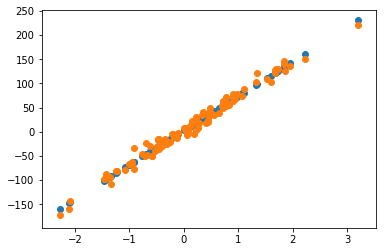

In [267]:
plt.scatter(x,preds)
plt.scatter(x,y)

Indeed, we can see that the predictions we make follow what looks like a line of best fit for the data

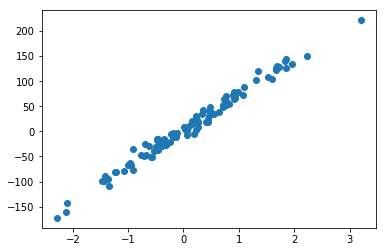

In [269]:
#Look at the original data
plt.scatter(x,y)

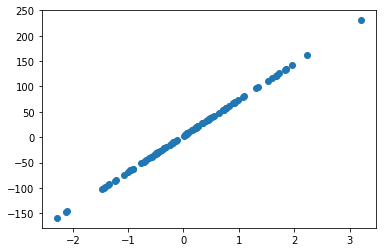

In [271]:
#Look at the predictions
plt.scatter(x,preds)

In [272]:
#look at the error
mse

83.94069527435951

That's it! It looks like everything is working, so we'll try using the implementation of the class

In [273]:
m = LinearRegression(x,y)

In [274]:
m.fit()

In [275]:
preds = m.predict(x)

In [276]:
m.mse()

83.94069527435951

From this exercise, we're able to see a simple implementation of a statistical model, applied in an object-oriented manner. We now have an algorithm that we can call on any time we believe a single variable is important to predicting another in a linear manner.